In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export, export_graphviz
import graphviz 
base = pd.read_csv('risco-credito.csv')
base

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [25]:
previsores = base.iloc[:,0:4].values
classe = base.iloc[:,4].values
classe


array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Normalizer, StandardScaler
labelEnconder_previsores= LabelEncoder()
previsores[:,0] = labelEnconder_previsores.fit_transform(previsores[:,0])
previsores[:,1] = labelEnconder_previsores.fit_transform(previsores[:,1])
previsores[:,2] = labelEnconder_previsores.fit_transform(previsores[:,2])
previsores[:,3] = labelEnconder_previsores.fit_transform(previsores[:,3])
previsores

array([[3, 0, 1, 0],
       [2, 0, 1, 1],
       [2, 1, 1, 1],
       [2, 1, 1, 2],
       [2, 1, 1, 2],
       [2, 1, 0, 2],
       [3, 1, 1, 0],
       [3, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [1, 0, 1, 2],
       [3, 0, 1, 1]], dtype=object)

In [27]:
classificador = DecisionTreeClassifier(criterion="entropy")
#treinamento 
classificador.fit(previsores, classe)
#historia boa divita alta garantia nenhuma renda > 35
#historia ruim, divida alta, garantia adequada, renda < 15
#classificador
print(classificador.feature_importances_)


[0.48015651 0.03885431 0.03885431 0.44213486]


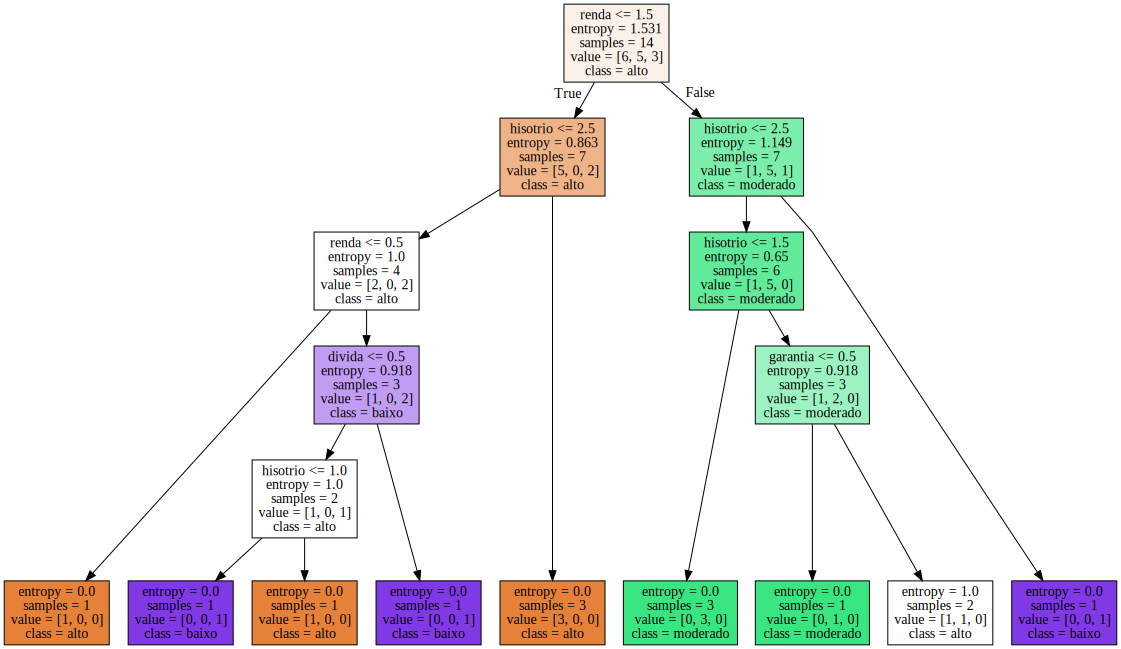

In [28]:
dot_data = export.export_graphviz(classificador,out_file=None, feature_names=['hisotrio','divida' ,'garantia', 'renda'],
                      class_names = ['alto', 'moderado', 'baixo'], filled = True, leaves_parallel=True)
graph = graphviz.Source(dot_data)
graph

In [29]:

#historia boa divita alta garantia nenhuma renda > 35
#historia ruim, divida alta, garantia adequada, renda < 15
resultado = classificador.predict([[0,0,1,2],[3,0,0,0]])
resultado


array(['baixo', 'alto'], dtype=object)